In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

baseline = pd.read_csv("patient_baseline.csv", sep='\t')
longitudinal = pd.read_csv("patient_longitudinal.csv", sep='\t')
treatment = pd.read_csv("patient_treatment.csv", sep='\t')


### Time Series Tasks
1. Convert the longitudinal blood pressure measurements into a proper time series:
- Create a pandas Series with DatetimeIndex using visit_date
- Handle any missing or duplicate measurements appropriately
- Tips:
    - Use pd.to_datetime() with format='%Y-%m-%d' for reliable parsing
    - Handle duplicates with duplicated() and appropriate aggregation
    - Consider timezone handling with tz_localize() if needed
    - Use interpolate() or fillna() for missing values

In [9]:
print(longitudinal.describe())
print(longitudinal.info())
print(longitudinal.head(10))

longitudinal['visit_date'] = pd.to_datetime(longitudinal['visit_date'], format = '%Y-%m-%d')
bp_series = pd.Series(data = longitudinal['bp_systolic'].values, index = longitudinal['visit_date'])

bp_series = bp_series[~bp_series.index.duplicated(keep='last')] # drop dupicates
bp_series = bp_series.interpolate() # fill missing values


         patient_id   bp_systolic    heart_rate  adverse_event           age  \
count  60000.000000  60000.000000  60000.000000   60000.000000  60000.000000   
mean     499.500000    134.457795     77.976540       0.094417     50.319300   
std      288.677396     18.584061     18.047806       0.292410     14.463439   
min        0.000000     51.600000      1.800000       0.000000     18.000000   
25%      249.750000    122.100000     66.000000       0.000000     40.275000   
50%      499.500000    134.300000     77.900000       0.000000     50.400000   
75%      749.250000    146.700000     89.600000       0.000000     59.700000   
max      999.000000    209.700000    152.800000       1.000000     90.000000   

                sex           bmi       smoking      diabetes  
count  60000.000000  60000.000000  60000.000000  60000.000000  
mean       0.515000     27.095600      0.274000      0.282000  
std        0.499779      4.880254      0.446013      0.449977  
min        0.000000    

visit_date
2023-01-17    137.0
2023-02-22    137.6
2023-03-23    133.4
2023-04-16    133.9
2023-06-05    135.5
2023-06-16    135.9
2023-06-21    132.6
2023-07-03    132.3
2023-08-23    130.0
2023-10-13    127.7
2023-10-20    127.2
2023-12-13    127.4
2024-01-17    127.1
2024-03-01    125.6
2024-04-17    124.8
2024-04-04    126.3
2024-03-14    127.3
2024-05-19    129.0
2024-07-03    125.8
2024-05-25    123.6
2024-10-21    123.9
2024-10-05    123.3
2024-11-14    122.5
2025-01-19    124.3
2024-12-07    126.1
2025-02-20    126.6
2025-02-25    119.7
2025-03-25    115.9
2025-04-03    115.3
2025-07-31    113.5
2025-06-17    113.6
2025-08-26    116.0
2025-06-23    116.7
2025-11-12    119.6
2025-12-08    120.1
2025-12-04    120.7
2025-12-22    118.4
2026-02-14    117.0
2026-05-24    115.9
2026-01-26    116.7
2026-05-30    116.1
2026-04-28    118.8
2026-06-30    116.8
2026-07-22    117.6
2026-08-15    117.7
2026-09-30    114.8
2026-09-19    115.3
2027-01-07    119.1
2026-10-26    119.8
2027-02-1

2. Analyze blood pressure trends:
- Resample the data to monthly frequency using mean aggregation
- Calculate 3-month moving averages to smooth out short-term fluctuations
- Visualize both the original and smoothed trends
- Tips:
    - Use resample('ME').mean() for month-end frequency
    - Add min_periods to rolling() to handle edge cases
    - Consider interpolate() method for gaps
    - Use ewm() for exponential weighted alternatives

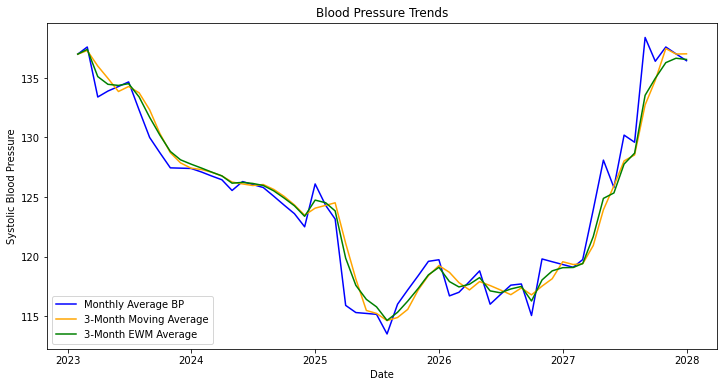

In [18]:
monthly_bp = bp_series.resample('M').mean() # resampling data to monthly frequencies using mean aggregation 
monthly_bp = monthly_bp.interpolate() # handle missing values
three_mo_bp = monthly_bp.rolling(window=3, min_periods=1).mean() # 3-month moving averages

monthly_bp_ewm = monthly_bp.ewm(span=3, min_periods=1).mean()

# visualization of trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_bp, label="Monthly Average BP", color='blue')
plt.plot(three_mo_bp, label="3-Month Moving Average", color='orange')
plt.plot(monthly_bp_ewm, label="3-Month EWM Average", color='green')
plt.xlabel("Date")
plt.ylabel("Systolic Blood Pressure")
plt.title("Blood Pressure Trends")
plt.legend()
plt.show()

### Statistical Modeling Tasks
1. Analyze factors affecting baseline blood pressure:
- Use statsmodels OLS to predict bp_systolic
- Include age, bmi, smoking, and diabetes as predictors
- Interpret the coefficients and their p-values
- Assess model fit using R-squared and diagnostic plots
- Tips:
    - Create feature matrix X with predictors and add constant term using sm.add_constant()
    - Use sm.OLS(y, X).fit() to fit the model
    - Use summary() to examine p-values and confidence intervals
    - Plot residuals vs fitted values and Q-Q plot
    - Consider robust standard errors with HC3 covariance type

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     149.1
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          6.36e-100
Time:                        08:14:25   Log-Likelihood:                -3700.7
No. Observations:                1000   AIC:                             7411.
Df Residuals:                     995   BIC:                             7436.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4929      1.979     54.812      0.0

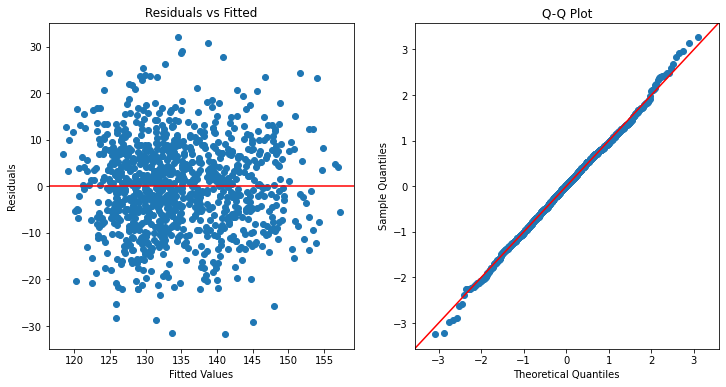

,patient_id,age,sex,bmi,smoking,diabetes,bp_systolic,cholesterol,heart_rate,treatment,adherence,outcome
0,0,57.5,0,25.8,0,0,108.7,257.9,79.3,0,0.81,0
1,1,47.9,0,23.2,0,0,149.4,155.9,75.4,1,0.91,1
2,2,59.7,1,29.0,0,0,136.7,220.7,85.0,1,0.73,1
3,3,72.8,1,34.6,0,1,141.0,205.7,78.0,1,0.91,1
4,4,46.5,0,17.5,0,0,129.0,186.8,95.2,0,0.77,0
5,5,46.5,1,27.4,1,0,136.2,199.1,70.3,1,0.64,1
6,6,73.7,0,27.1,0,0,130.9,196.8,72.2,1,0.92,1
7,7,61.5,1,30.8,0,1,146.6,243.7,74.9,1,0.65,0
8,8,43.0,1,27.8,1,0,127.4,226.7,88.7,1,0.48,0
9,9,58.1,1,23.6,0,1,138.1,206.6,88.5,0,0.88,1


In [29]:
X = baseline[['age', 'bmi', 'smoking', 'diabetes']] # predictors
X = sm.add_constant(X)  # add intercept term
y = baseline['bp_systolic'] # outcome variable
model = sm.OLS(y, X).fit(cov_type ='HC3')

print(model.summary())

# residuals vs fitted plot
fig, (p1, p2) = plt.subplots(1, 2, figsize=(12, 6))
p1.scatter(x=model.fittedvalues, y=model.resid)
p1.axhline(y=0, color='r')
p1.set_xlabel("Fitted Values")
p1.set_ylabel("Residuals")
p1.set_title("Residuals vs Fitted")

# Q-Q plot
sm.qqplot(model.resid, line='45', fit = True, ax=p2)
p2.set_title("Q-Q Plot")

plt.show()

The model explains 37.6% of the variation in systolic blood pressure. Diabetes has the largest effect size, with a coefficient of 9.87. The large effect size and high significance make diabetes the strongest predictor. Smoking also shows a strong association, with smokers having 5.24 mm Hg higher blood pressure on average than non-smokers. This effect is both large and statistically significant.  Although Age and BMI are statistically significant (p < 0.001), they have smaller coefficients (0.284 and 0.279, respectively). This suggests that while age and BMI contribute to the model, their influence on blood pressure is weaker relative to diabetes and smoking.

2. Model treatment effectiveness:
- Fit a GLM with binomial family to predict treatment success
- Use baseline characteristics and adherence as predictors
- Report odds ratios and their confidence intervals
- Assess model fit using deviance and diagnostic plots
- Tips:
    - Create feature matrix X with predictors and add constant term
    - Use sm.GLM(y, X, family=sm.families.Binomial()).fit()
    - Get odds ratios with np.exp(params)
    - Check residual deviance vs null deviance
    - Use influence() to detect influential observations

In [41]:
# print(treatment.info())
# print(treatment.head())

X = treatment[['age', 'sex','bmi', 'smoking', 'diabetes', 'adherence']]  
X = sm.add_constant(X) 
y = treatment['outcome'] 

# fit GLM 
glm_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(glm_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -656.02
Date:                Fri, 08 Nov 2024   Deviance:                       1312.0
Time:                        08:23:32   Pearson chi2:                 1.00e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01974
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2258      0.693     -1.769      0.0

In [40]:
# odds ratio & CI
params = glm_model.params
odds_ratio = np.exp(params)
print(odds_ratio)
CI = np.exp(glm_model.conf_int())
print(CI)

const        0.293511
age          1.002867
sex          0.889355
bmi          1.030943
smoking      0.672959
diabetes     0.614336
adherence    1.115807
dtype: float64
                  0         1
const      0.075495  1.141116
age        0.993546  1.012276
sex        0.686602  1.151980
bmi        1.002697  1.059985
smoking    0.452475  1.000881
diabetes   0.439274  0.859163
adherence  0.301113  4.134750


Residual deviance:  1312.0428181453003
Null deviance:  1331.9768185036041
Deviance difference: 19.93400035830382


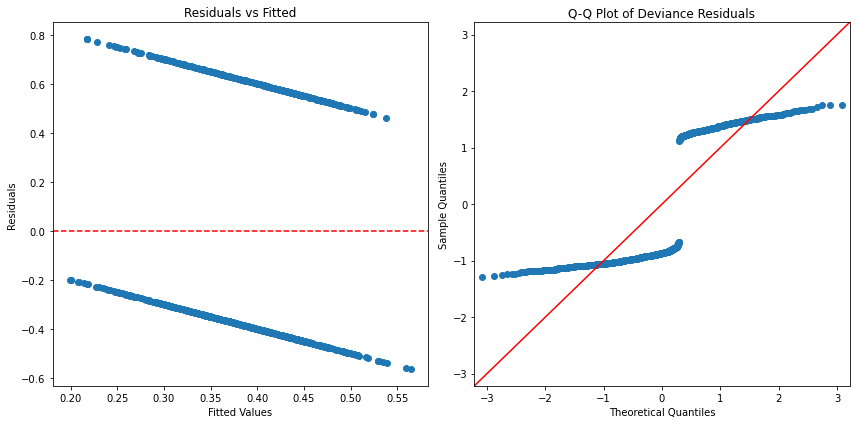

In [70]:
# residual deviance vs null deviance 
print("Residual deviance: ", glm_model.deviance)
print("Null deviance: ", glm_model.null_deviance)
print("Deviance difference:", glm_model.null_deviance - glm_model.deviance)


fig, (p1, p2) = plt.subplots(1, 2, figsize=(12, 6))

# Residuals vs Fitted plot
p1.scatter(glm_model.fittedvalues, glm_model.resid_response)
p1.axhline(y=0, color='r', linestyle='--')
p1.set_xlabel("Fitted Values")
p1.set_ylabel("Residuals")
p1.set_title("Residuals vs Fitted")

# Q-Q Plot of Deviance 
sm.graphics.qqplot(glm_model.resid_deviance, line='45', ax=p2)
p2.set_title('Q-Q Plot of Deviance Residuals')
plt.tight_layout()
plt.show()


The most important predictors in this model are BMI and diabetes, based on their odds ratios and confidence intervals.

- BMI: The odds ratio of 1.031 suggests that each unit increase in BMI is associated with a 3.1% increase in the odds of treatment success. The confidence interval (1.003 to 1.060) does not include 1, indicating a statistically significant positive effect.

- Diabetes: The odds ratio of 0.614 indicates that individuals with diabetes have 38.6% lower odds of treatment success compared to those without diabetes. The confidence interval (0.439 to 0.859) does not include 1, indicating this a statistically significant predictor with a negative impact on treatment success.

     dfb_const   dfb_age   dfb_sex   dfb_bmi  dfb_smoking  dfb_diabetes  \
0    -0.001298 -0.021409  0.030802  0.003518     0.012484      0.019252   
1    -0.010444  0.003077 -0.035767 -0.022061     0.008769     -0.000300   
2     0.005502  0.026999  0.033196  0.014783    -0.031679     -0.040932   
3    -0.102172  0.039129  0.033617  0.040767     0.042307      0.066679   
4    -0.038130 -0.002577  0.022700  0.046495     0.017960      0.005438   
..         ...       ...       ...       ...          ...           ...   
995   0.074815 -0.003459 -0.038529 -0.020609    -0.063393     -0.037144   
996  -0.021721 -0.033891  0.022828  0.035153     0.016546     -0.026302   
997  -0.003442 -0.005202 -0.019195  0.030743    -0.002604     -0.037753   
998  -0.026683  0.011817  0.027793  0.009961     0.022622      0.013287   
999   0.024814  0.028883 -0.037928 -0.006713    -0.034580     -0.033882   

     dfb_adherence   cooks_d  standard_resid  hat_diag  dffits_internal  
0        -0.001778  0.000

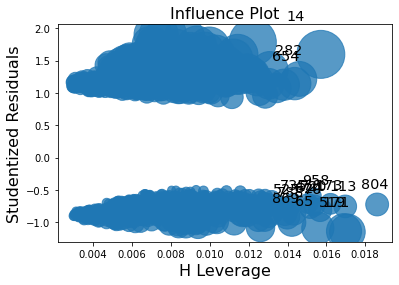

In [71]:
# Influence summary and plot
influence = glm_model.get_influence()
influence_summary = influence.summary_frame()
print(influence_summary)
influence_plot = influence.plot_influence()


n = glm_model.nobs
cook_threshold = 4 / n
influential_points = influence_summary[influence_summary['cooks_d'] > cook_threshold]
print(influential_points)


Text(0.5, 1.0, "Leverage vs. Cook's Distance")

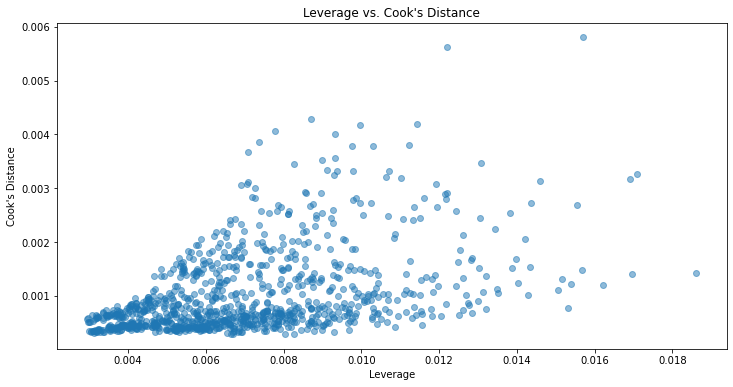

In [64]:
# Influence plot 
plt.figure(figsize=(12, 6))
influence = glm_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]
plt.scatter(leverage, cooks_d, alpha=0.5)
plt.xlabel("Leverage")
plt.ylabel("Cook's Distance")
plt.title("Leverage vs. Cook's Distance")

# a few significantly influential points 